<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Monte_Carlo_Crudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Avance 1*

In [10]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def f(x):
    return np.sqrt(np.arctan(x))

x = np.linspace(0, 1, 10)
y = f(x)

print(x)
print(y)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.3326518  0.46762051 0.5672306  0.64670266 0.71210849
 0.76681328 0.81304561 0.85243319 0.88622693]


*Avance 2*

In [21]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def g(x):
    return np.sqrt(np.arctan(x))
x = np.linspace(0, 1, 10000)
y = g(x)

# Método de Monte Carlo Crudo
def monte_carlo_crudo(n):
    suma = 0
    for _ in range(n):
        x = rd.random()
        suma += g(x)
    return suma / n  #1/N (suma de g(x_i))

# Estimación de la integral
n = 10000  # Número de muestras
estimacion = monte_carlo_crudo(n)
print('Estimacion de la integral con', n, 'muestras:', estimacion)

#Graficar la estimación de la integral


Estimacion de la integral con 10000 muestras: 0.633130653742788


*INTENTO DE GRAFICA*

Estimacion de la integral con 1000000 muestras: 0.6300579721776054
[np.float64(0.6110405128231277), np.float64(0.7151450627905687), np.float64(0.607708687784498), np.float64(0.7679392695897505), np.float64(0.6222640280307127), np.float64(0.63422457087495), np.float64(0.7098461522138534), np.float64(0.6831520374297719), np.float64(0.624648435397673), np.float64(0.6230955728216852), np.float64(0.6482594431103411), np.float64(0.6250828015875179), np.float64(0.6424528884398615), np.float64(0.6860710433579682), np.float64(0.6052790910200675), np.float64(0.6451365006919298), np.float64(0.5849043146636557), np.float64(0.618634333280893), np.float64(0.7013534053011324), np.float64(0.6134250158939859), np.float64(0.6796201969382307), np.float64(0.5806001142695756), np.float64(0.57812754736329), np.float64(0.63007790327589), np.float64(0.6037534242560426), np.float64(0.6333041675405), np.float64(0.598015041676996), np.float64(0.6404243729199062), np.float64(0.6145042106361269), np.float64(0.5894

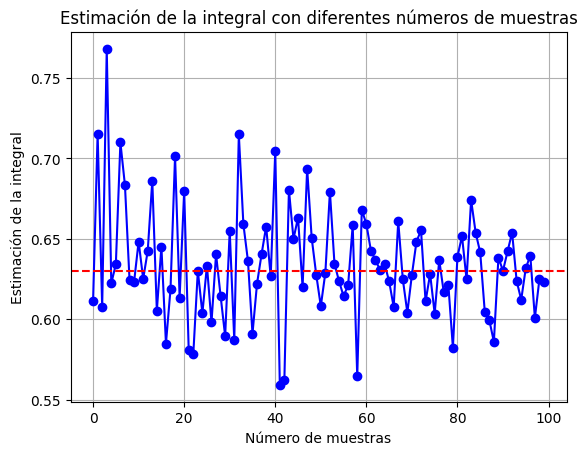

In [34]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definimos nuestra función
def g(x):
    return np.sqrt(np.arctan(x))
x = np.linspace(0, 1, 10000)
y = g(x)

# Método de Monte Carlo Crudo
def monte_carlo_crudo(n):
    suma = 0
    for _ in range(n):
        x = rd.random()
        suma += g(x)
    return suma / n  #1/N (suma de g(x_i))

# Estimación de la integral
n = 1000000  # Número de muestras
estimacion = monte_carlo_crudo(n)
print('Estimacion de la integral con', n, 'muestras:', estimacion)

#Definimos el experimento
def experimento(n):
    l=[]
    for i in range(1,n+1):
        l.append(monte_carlo_crudo(i))
    return l

l=experimento(100)
print(l)

#Graficar la estimación de la integral
plt.plot(l, marker="o", linestyle="-", color="b")
plt.xlabel("Número de muestras")
plt.ylabel("Estimación de la integral")
plt.title("Estimación de la integral con diferentes números de muestras")
plt.axhline(y=estimacion, color='r', linestyle='--')
plt.grid(True)
plt.show()
